In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "../Dataset/wine-reviews/"
file = "winemag-data-130k-v2.csv"

In [3]:
csv_130k = pd.read_csv(path + file, index_col=0)

In [4]:
csv_130k.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


# 数据可视化和摘要
## 数据摘要  
### 标称属性
* country、province、region_1、region_2、variety、winery
* 给出每个可能聚会的频数  

#### country

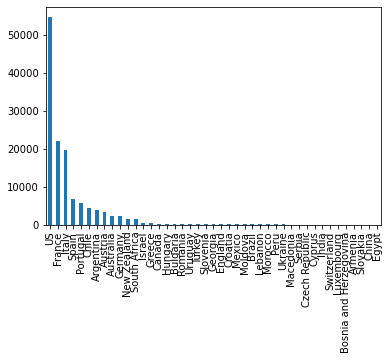

In [5]:
csv_130k['country'].value_counts().plot.bar()

由于**country**属性的取值较多，所以将频数在10名之后的全部取为**Another**，以便于观察。

In [6]:
csv_130k1 = csv_130k.copy(deep=True)
another = csv_130k1.country.value_counts().index[10:].tolist()  # 10名之后全部归位another类
# csv_130k1.country.value_counts()
mapping = {}
for s in another:
    mapping[s] = 'Another'
csv_130k1['country'] = csv_130k1['country'].map(lambda x: mapping[x] if x in mapping else x)

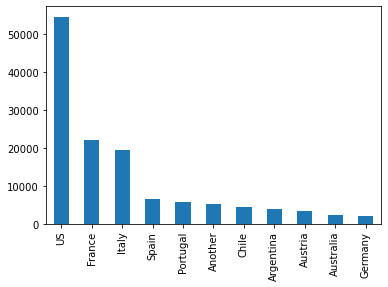

In [7]:
csv_130k1['country'].value_counts().plot.bar()

#### province
**province**和**country**同理，频数50名值后归为**Another**。

In [8]:
csv_130k1 = csv_130k.copy(deep=True)
another = csv_130k1.province.value_counts().index[50:].tolist()  
# csv_130k1.country.value_counts()
mapping = {}
for s in another:
    mapping[s] = 'Another'
csv_130k1['province'] = csv_130k1['province'].map(lambda x: mapping[x] if x in mapping else x)

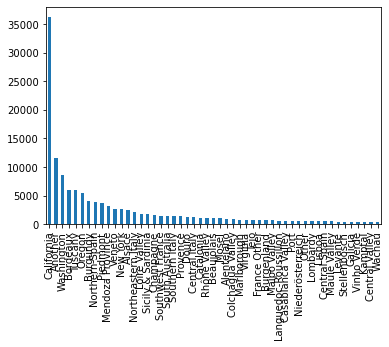

In [9]:
csv_130k1['province'].value_counts().plot.bar()

#### variety

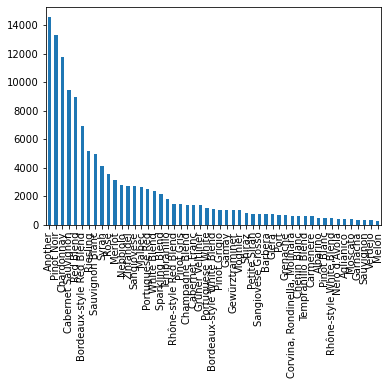

In [10]:
csv_130k1 = csv_130k.copy(deep=True)
another = csv_130k1.variety.value_counts().index[50:].tolist()  
# csv_130k1.country.value_counts()
mapping = {}
for s in another:
    mapping[s] = 'Another'
csv_130k1['variety'] = csv_130k1['variety'].map(lambda x: mapping[x] if x in mapping else x)
csv_130k1['variety'].value_counts().plot.bar()

### 数值属性
* 数值属性有：points，price
* 5数概括通过`describe()`函数给出（如下所示）： 
  
||min | Q1 | 中位数 | Q3 | max|  
| :-: | :--: | :--: | :--: | :--: | :--: |   
|points | 80 | 86 | 88 | 91 | 100 |  
|price | 4 | 17| 25 | 42 | 3000 | 

* 缺失值的个数通过`info()`函数给出（如下所示）：**points**没有缺失值，**price**缺失值为**8996**个

In [11]:
pd.DataFrame(csv_130k[['points', 'price']]).info()
csv_130k.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 2 columns):
points    129971 non-null int64
price     120975 non-null float64
dtypes: float64(1), int64(1)
memory usage: 3.0 MB


,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


## 数据可视化
### 直方图

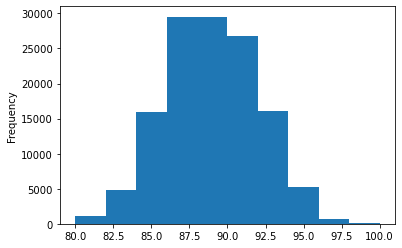

In [12]:
csv_130k['points'].plot.hist()

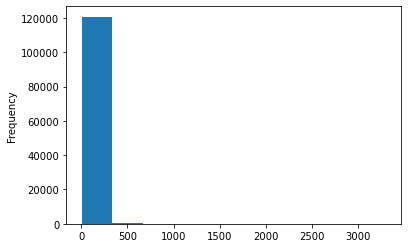

In [13]:
csv_130k['price'].plot.hist()

取price < 200:

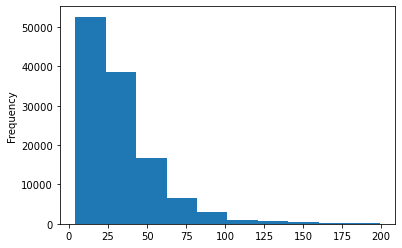

In [14]:
csv_130k[csv_130k["price"]<200]['price'].plot.hist()

### 盒图

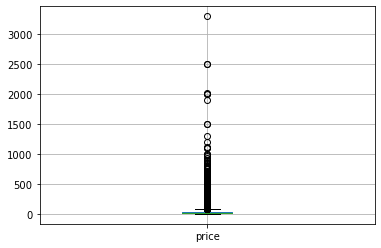

In [15]:
price_130k = pd.DataFrame(csv_130k.price)
price_130k.boxplot(sym = 'o')  # 中间箱体是否缺口) #也可用plot.box()
plt.show()

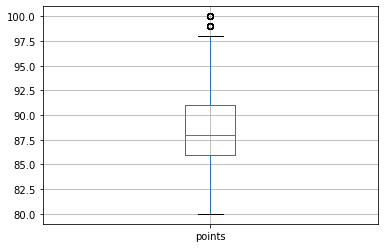

In [16]:
points_130k = pd.DataFrame(csv_130k.points)
points_130k.boxplot(sym = 'o')  # 中间箱体是否缺口) #也可用plot.box()
plt.show()

# 数据缺失的处理
## 观察数据集中缺失数据，分析其缺失的原因。

在此数据集中，存在缺失值的属性有：country、designation、price、province、region_1、region_2、tastre_name、taster_twitter_handle、variety。
* **country**描述了葡萄酒产自哪个国家国家，缺失值个数为63；  
**designation**描述了酿酒的葡萄具体来自酿酒厂内的哪块葡萄园，缺失值个数为37465；  
**province**是指葡萄酒产自的省或州，缺失值个数为63；  
**region_1**为一个省或州的葡萄酒种植区，缺失值个数为21247；  
**region_2**葡萄酒种植区中指定了更具体的区域，但该值有时可以为空，缺失值个数为79460。  
***
这五个属性均为描述葡萄酒产地的属性，存在缺失值的可能原因：评论者对于产地信息不了解，没填写，导致缺失值。  
**country**和**province**缺失值较少，因为一般红酒瓶身/包装通常会标注这两个属性；但其他三个属性对于地域的描述越来越细致，这些信息通常较难从瓶身/包装获取，所以缺失值较多。

* 同样的，在评论系统中，**price**可能为为选填属性，所以造成了缺失。
* **taster_name**和**taster_twitter_handle**缺失，可能是因为匿名评论或者其为选填属性。
* **variety**值缺失一个，可能是异常缺失。

In [17]:
total = csv_130k.isnull().sum().sort_values(ascending = False)
percent = (csv_130k.isnull().sum()/csv_130k.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
region_2,79460,61.136715
designation,37465,28.825661
taster_twitter_handle,31213,24.015357
taster_name,26244,20.192197
region_1,21247,16.347493
price,8996,6.921544
province,63,0.048472
country,63,0.048472
variety,1,0.000769
winery,0,0.000000


分别使用下列四种策略对缺失值进行处理: 
*注意：在处理后，要可视化地对比新旧数据集。*
## 将缺失部分剔除
剔除所有存在缺失值的行后，此数据集还剩下**22387**条数据

In [18]:
dropna_130k = csv_130k.copy(deep=True)
dropna_130k.dropna()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129919,US,"This ripe, rich, almost decadently thick wine ...",Reserve,91,105.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Nicholas Cole Cellars 2004 Reserve Red (Walla ...,Red Blend,Nicholas Cole Cellars
129926,US,This pure Syrah from Reininger's estate vineya...,Ash Hollow Vineyard,91,41.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Reininger 2005 Ash Hollow Vineyard Syrah (Wall...,Syrah,Reininger
129945,US,Hailing from one of the more popular vineyards...,Jurassic Park Vineyard Old Vines,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino
129949,US,There's no bones about the use of oak in this ...,Barrel Fermented,90,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs


## 用最高频率值来填补缺失值

对每个属性均使用最高频率值填补缺失值后，可视化：

In [19]:
fillna_130k = csv_130k.copy(deep=True) 
# country
most_country = fillna_130k.country.value_counts().index[0]
fillna_130k.country = fillna_130k.country.fillna(most_country)
# designation
most_designation = fillna_130k.designation.value_counts().index[0]
fillna_130k.designation = fillna_130k.designation.fillna(most_designation)
# price
most_price = fillna_130k.price.value_counts().index[0]
fillna_130k.price = fillna_130k.price.fillna(most_price)
# province
most_province = fillna_130k.province.value_counts().index[0]
fillna_130k.province = fillna_130k.province.fillna(most_province)
# region_1
most_region_1 = fillna_130k.region_1.value_counts().index[0]
fillna_130k.region_1 = fillna_130k.region_1.fillna(most_region_1)
# region_2
most_region_2 = fillna_130k.region_2.value_counts().index[0]
fillna_130k.region_2 = fillna_130k.region_2.fillna(most_region_2)
# variety
most_variety = fillna_130k.variety.value_counts().index[0]
fillna_130k.variety = fillna_130k.variety.fillna(most_variety)

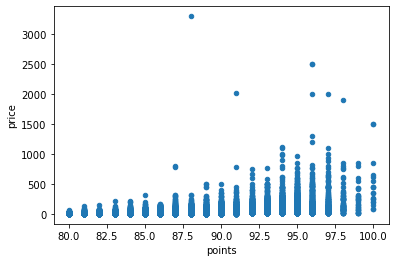

In [20]:
fillna_130k.plot.scatter(x='points', y='price')

In [21]:
fillna_130k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129971 non-null object
description              129971 non-null object
designation              129971 non-null object
points                   129971 non-null int64
price                    129971 non-null float64
province                 129971 non-null object
region_1                 129971 non-null object
region_2                 129971 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129971 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


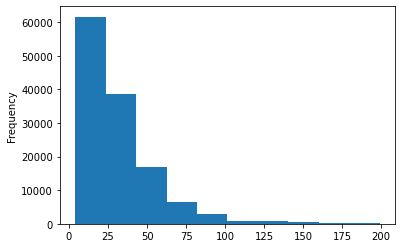

In [22]:
fillna_130k[fillna_130k["price"]<200]['price'].plot.hist()

## 通过属性的相关关系来填补缺失值
### variety
variety只有一个缺失值，先进行填补：

In [23]:
fillna_130k = csv_130k.copy(deep=True)

In [24]:
fillna_130k[fillna_130k['variety'].isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
86909,Chile,"A chalky, dusty mouthfeel nicely balances this...",NaN,88,17.0,Maipo Valley,NaN,NaN,NaN,NaN,Carmen 1999 (Maipo Valley),NaN,Carmen


本来以为有**country**、**province**和**winery**三个属性限制能找出点相关关系，结果发现好像关系不好找……  
那就填一个频率最高的'Cabernet Sauvignon'吧……

In [27]:
fillna_130k[(fillna_130k['country']=='Chile') & (fillna_130k['province']=='Maipo Valley') & (fillna_130k['winery']=='Carmen')]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
382,Chile,"With its herbal, traditional aromas, this New ...",Estate Grown Reserve,88,15.0,Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Carmen 2000 Estate Grown Reserve Cabernet Sauv...,Cabernet Sauvignon,Carmen
11102,Chile,"A blend of 50% Cabernet Sauvignon, 20% Grande ...",Winemaker's Reserve,91,40.0,Maipo Valley,NaN,NaN,NaN,NaN,Carmen 1997 Winemaker's Reserve Red (Maipo Val...,Red Blend,Carmen
12435,Chile,"This smells a bit green, with aromas of herb, ...",Gran Reserva Maipo Alto,87,15.0,Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Carmen 2009 Gran Reserva Maipo Alto Petite Sir...,Petite Sirah,Carmen
22893,Chile,"Dry, leafy and herbal, with cherry, berry and ...",Reserva,88,20.0,Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Carmen 2007 Reserva Carmenère-Cabernet Sauvign...,Carmenère-Cabernet Sauvignon,Carmen
25936,Chile,"This smells a bit green, with aromas of herb, ...",Gran Reserva Maipo Alto,87,15.0,Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Carmen 2009 Gran Reserva Maipo Alto Petite Sir...,Petite Sirah,Carmen
41015,Chile,"Berry, olive, spice and herbal aromas are typi...",Gran Reserva Maipo Alto,86,15.0,Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Carmen 2012 Gran Reserva Maipo Alto Cabernet S...,Cabernet Sauvignon,Carmen
50855,Chile,"Wet clay, tomato paste, oregano and carob arom...",Gran Reserva Maipo Alto,83,15.0,Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Carmen 2010 Gran Reserva Maipo Alto Merlot (Ma...,Merlot,Carmen
55185,Chile,"Slightly hard, burnt and earthy at first, with...",NaN,86,10.0,Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Carmen 2007 Syrah (Maipo Valley),Syrah,Carmen
61977,Chile,There's a sea of basic Cabernet that comes out...,NaN,83,10.0,Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Carmen 2007 Cabernet Sauvignon (Maipo Valley),Cabernet Sauvignon,Carmen
86909,Chile,"A chalky, dusty mouthfeel nicely balances this...",NaN,88,17.0,Maipo Valley,NaN,NaN,NaN,NaN,Carmen 1999 (Maipo Valley),NaN,Carmen


In [28]:
fillna_130k.loc[fillna_130k['variety'].isnull(), 'variety'] = 'Cabernet Sauvignon'

### country、province

首先查看**country**属性，不难发现，在**country**属性缺失的情况下，**province**也缺失，所以这两个属性的缺失值可以同时填补。 

In [20]:
fillna_130k[fillna_130k['country'].isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124176,NaN,This Swiss red blend is composed of four varie...,Les Romaines,90,30.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Les Frères Dutruy 2014 Les Romaines Red,Red Blend,Les Frères Dutruy
129407,NaN,Dry spicy aromas of dusty plum and tomato add ...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Cabernet Sauvignon,Cabernet Sauvignon,El Capricho
129408,NaN,El Capricho is one of Uruguay's more consisten...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Tempranillo,Tempranillo,El Capricho
129590,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ


In [30]:
def newCountry(cols):
    country = cols[0]
    variety = cols[1]
    winery = cols[2]
    if pd.isnull(country):
        a = fillna_130k[(fillna_130k['variety']==variety) & (fillna_130k['winery']==winery)].copy(deep=True)
        a1 = a[a.country.notnull()]
        if len(a1) > 0:
            country1 = a1.iloc[0, 0]
            return country1
        else:
            country1 = fillna_130k.country.value_counts().index[0]
            return country1        
    else:
        return country
fillna_130k['country'] = fillna_130k[['country', 'variety', 'winery']].apply(newCountry, axis=1)

In [31]:
def newProvince(cols):
    province = cols[0]
    variety = cols[1]
    winery = cols[2]
    if pd.isnull(province):
        a = fillna_130k[(fillna_130k['variety']==variety) & (fillna_130k['winery']==winery)].copy(deep=True)
        a1 = a[a.province.notnull()]
        if len(a1) > 0:
            province1 = a1.iloc[0, 5]
            return province1
        else:
            province1 = fillna_130k.province.value_counts().index[0]
            return province1        
    else:
        return province
fillna_130k['province'] = fillna_130k[['province', 'variety', 'winery']].apply(newProvince, axis=1)

填补缺失值后，可视化结果：（由于缺失值较少，所以填补后，可视化结果不是太明显）

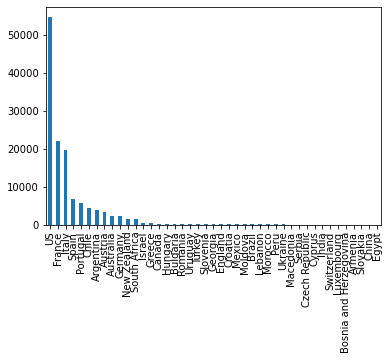

In [32]:
fillna_130k['country'].value_counts().plot.bar()

### designation 未完成
> The vineyard within the winery where the grapes that made the wine are from  

这个属性指的是“酿酒的葡萄所来自的酿酒厂内的葡萄园”，那么很可能和**variety**和**winery**属性相关。

In [ ]:
# def newDesignation(cols):
#     designation = cols[0]
#     variety = cols[1]
#     winery = cols[2]
#     if pd.isnull(designation):
#         a = fillna_130k[(fillna_130k['variety']==variety) & (fillna_130k['winery']==winery)].copy(deep=True)
#         a1 = a[a.designation.notnull()]
#         if len(a1) > 0:
#             designation1 = a1.iloc[0, 2]
#             return designation1
#         else:
#             designation1 = fillna_130k.designation.value_counts().index[0]
#             return designation1        
#     else:
#         return designation
# fillna_130k['designation'] = fillna_130k[['designation', 'variety', 'winery']].apply(newDesignation, axis=1)

In [72]:
grouped=fillna_130k.groupby(['variety', 'winery'])
print(grouped.size())

variety      winery            
Abouriou     Cave du Marmandais    1
             Cerridwen             1
             Lionel Osmin & Cie    1
Agiorgitiko  Boutari               2
             Constantin Gofas      1
                                  ..
Zweigelt     Winzerkeller Andau    2
             Zantho                9
             Zull                  2
Çalkarası    Pasaeli               2
Žilavka      Stobi                 1
Length: 43386, dtype: int64


In [ ]:
# Abouriou     Cave du Marmandais
fillna_130k[(fillna_130k['variety']=='Zweigelt') & (fillna_130k['winery']=='Zantho')]
# fillna_150k[fillna_150k['winery']=='Achaia Clauss']

### price
葡萄酒的价格和葡萄的品种有关，所以根据每个品种的中位数来补全缺失值：

In [40]:
grouped = fillna_130k.groupby(['variety'])
median = grouped.price.median()
median

variety
Abouriou       15.0
Agiorgitiko    20.0
Aglianico      33.5
Aidani         27.0
Airen           9.0
               ... 
Zinfandel      28.0
Zlahtina       14.5
Zweigelt       18.0
Çalkarası      19.0
Žilavka        15.0
Name: price, Length: 707, dtype: float64

In [43]:
def newPrice(cols):
    price=cols[0]
    variety=cols[1]
    if pd.isnull(price):
        return median[variety]
    return price

fillna_130k.price = fillna_130k[['price','variety']].apply(newPrice,axis=1)

### region_2
region_2属性可以为空，则使用'Unknow'填充。

In [101]:
fillna_150k.region_2.fillna("Unknown")

0                      Napa
1                   Unknown
2                    Sonoma
3         Willamette Valley
4                   Unknown
                ...        
150925              Unknown
150926              Unknown
150927              Unknown
150928              Unknown
150929              Unknown
Name: region_2, Length: 150930, dtype: object

## 通过数据对象之间的相似性来填补缺失值 